In [1]:
!pip install mlflow


  Using cached mlflow-2.12.1-py3-none-any.whl.metadata (29 kB)
  Using cached flask-3.0.3-py3-none-any.whl.metadata (3.2 kB)
  Using cached alembic-1.13.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
  Using cached docker-7.0.0-py3-none-any.whl.metadata (3.5 kB)
  Using cached graphene-3.3-py2.py3-none-any.whl.metadata (7.7 kB)
  Using cached importlib_metadata-7.1.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached Markdown-3.6-py3-none-any.whl.metadata (7.0 kB)
  Using cached protobuf-5.26.1-cp37-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached querystring_parser-1.2.4-py2.py3-none-any.whl.metadata (559 bytes)
  Using cached sqlparse-0.5.0-py3-none-any.whl.metadata (3.9 kB)
  Using cached Jinja2-3.1.3-py3-none-any.whl.metadata (3.3 kB)
  Using cached gunicorn-21.2.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached Mako-1.3.3-py3-none-any.whl.metadata (2.9 kB)
  Using cached werkzeug-3.0.2-py3-none-any.whl.met

In [2]:
!pip install plot_keras_history


  Using cached plot_keras_history-1.1.38.tar.gz (11 kB)
  Preparing metadata (setup.py) ... done
  Using cached support_developer-1.0.5.tar.gz (4.9 kB)
  Preparing metadata (setup.py) ... done
  Using cached sanitize_ml_labels-1.0.51.tar.gz (322 kB)
  Preparing metadata (setup.py) ... done
  Using cached compress_json-1.0.10.tar.gz (6.4 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for plot_keras_history: filename=plot_keras_history-1.1.38-py3-none-any.whl size=9455 sha256=89d709288ef60d1795e97bbaaaa2cfd30e31b595a3f2b9fd4c4fed89cc5d273c
  Stored in directory: /home/akranth/.cache/pip/wheels/51/6f/f2/9d81e617c91b55343905f86f298549cd57ed2e0effb3304eef
  Created wheel for sanitize_ml_labels: filename=sanitize_ml_labels-1.0.51-py3-none-any.whl size=321865 sha256=52bda7bd08112c4745bcdf7810a3caefeee8425f11f21a776eef9c2d8b652981
  Stored in directory: /home/akranth/.cache/pip/wheels/a3/2a/54/8f791781cd066c2714e45a09962a75dc34867d8f9bc55f71e1
  Created wheel for support_develope

In [3]:
!pip install tensorflow

  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-24.3.25-py2.py3-none-any.whl.metadata (850 bytes)
  Using cached gast-0.5.4-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached protobuf-4.25.3-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached termcolor-2.4.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached tensorboard-2.16.2-py3-none-any.whl.metadata (1.6 kB)
  Using cached namex-0.0.8-py3-none-any.whl.metadata (246 bytes)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 370.6 kB/s eta 0:00:00 0:00:01
  Using cached tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata (1.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [6]:
import mlflow
import mlflow.keras
from mlflow.tracking import MlflowClient

In [4]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from plot_keras_history import show_history

2024-04-25 11:44:13.157632: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 11:44:13.167001: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-25 11:44:13.231738: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-25 11:44:15.020282: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [8]:
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment("MLFlow-Experiment-MNIST")


2024/04/25 11:49:04 INFO mlflow.tracking.fluent: Experiment with name 'MLFlow-Experiment-MNIST' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/687253196000577483', creation_time=1714025944410, experiment_id='687253196000577483', last_update_time=1714025944410, lifecycle_stage='active', name='MLFlow-Experiment-MNIST', tags={}>

In [9]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes = 10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(60000, 784) train input samples
(10000, 784) test input samples


In [10]:
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 10) train output samples
(10000, 10) test output samples


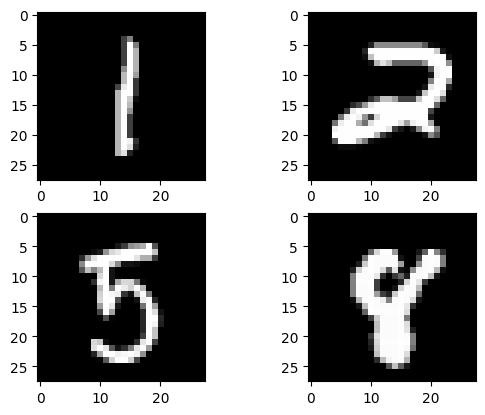

In [11]:
plt.subplot(221)
plt.imshow(X_train[310], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[515], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[1210], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[2150], cmap=plt.get_cmap('gray'))
plt.show()

2024/04/25 11:52:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of keras. If you encounter errors during autologging, try upgrading / downgrading keras to a supported version, or try upgrading MLflow.
/home/akranth/anaconda3/envs/big_data_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

2024-04-25 11:52:35.409348: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4144 - loss: 1.9930 - val_accuracy: 0.8225 - val_loss: 1.0064
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8467 - loss: 0.8440 - val_accuracy: 0.8885 - val_loss: 0.5311
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8921 - loss: 0.4862 - val_accuracy: 0.9058 - val_loss: 0.3820
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9100 - loss: 0.3580 - val_accuracy: 0.9156 - val_loss: 0.3202
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9191 - loss: 0.3075 - val_accuracy: 0.9227 - val_loss: 0.2864
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9270 - loss: 0.2721 - val_accuracy: 0.9259 - val_loss: 0.2652
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9310 - loss: 0.2560 - val_accuracy: 0.9298 - val_loss: 0.2475
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9351 - loss: 0.2354 - val_accuracy: 0.

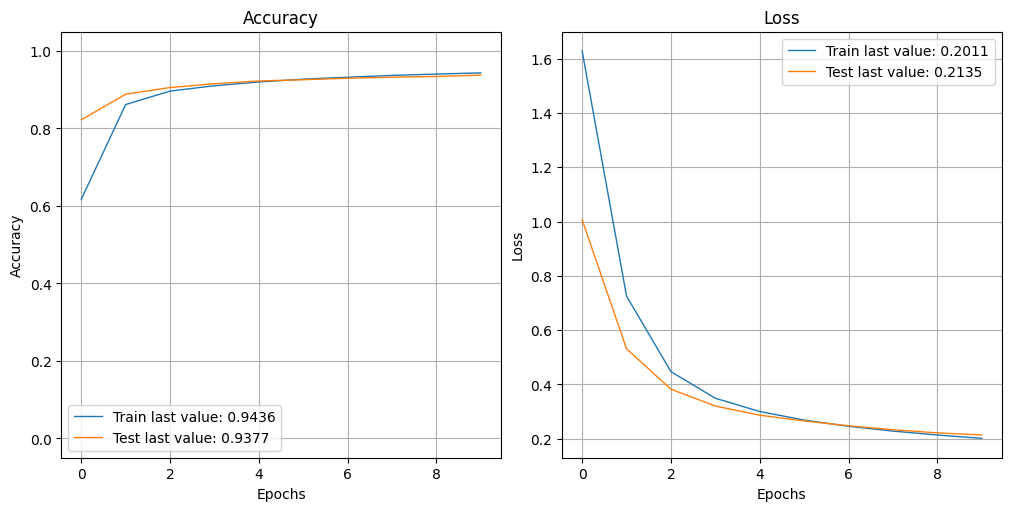

2024-04-25 11:53:05.366613: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Test accuracy: 0.9376999735832214
Train accuracy: 0.946066677570343


In [13]:
mlflow.keras.autolog()
with mlflow.start_run(run_name="Naive") as run:
    # let's try a basic neural network for digit classification
    model = keras.Sequential()
    model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model.add(layers.Dense(20, activation='sigmoid'))
    model.add(layers.Dense(10, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
    show_history(history)
    loss_test, acc_test = model.evaluate(x_test, y_test, verbose=0)
    loss_trial, acc_trial = model.evaluate(x_train, y_train, verbose=0)
    print("Test accuracy:", acc_test)
    print("Train accuracy:", acc_trial)


In [14]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Predicted Digit: 3


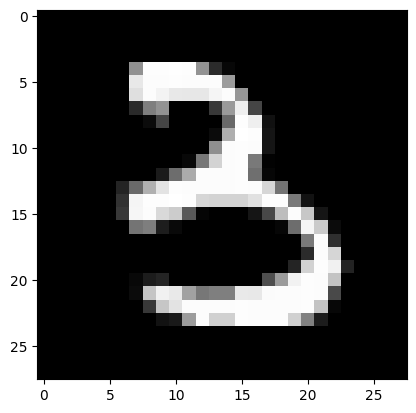

In [15]:
# check if the prediction is working fine for a random test point
test_pt = 782
plt.imshow(X_test[test_pt], cmap=plt.get_cmap('gray'))
probs = model.predict(x_test[test_pt:test_pt+1], verbose=True)
print("Predicted Digit:", np.argmax(probs))

2024/04/25 11:54:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
/home/akranth/anaconda3/envs/big_data_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

2024-04-25 11:54:20.716219: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6875 - loss: 1.1863

469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6881 - loss: 1.1840 - val_accuracy: 0.9197 - val_loss: 0.2744
Epoch 2/10
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9268 - loss: 0.2543

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9269 - loss: 0.2542 - val_accuracy: 0.9376 - val_loss: 0.2068
Epoch 3/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9460 - loss: 0.1829

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9460 - loss: 0.1829 - val_accuracy: 0.9538 - val_loss: 0.1538
Epoch 4/10
460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9581 - loss: 0.1421

469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9581 - loss: 0.1420 - val_accuracy: 0.9605 - val_loss: 0.1322
Epoch 5/10
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9666 - loss: 0.1136

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9666 - loss: 0.1136 - val_accuracy: 0.9665 - val_loss: 0.1126
Epoch 6/10
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9746 - loss: 0.0881

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9746 - loss: 0.0881 - val_accuracy: 0.9702 - val_loss: 0.0992
Epoch 7/10
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9787 - loss: 0.0754

469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9787 - loss: 0.0754 - val_accuracy: 0.9715 - val_loss: 0.0871
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9827 - loss: 0.0602

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9827 - loss: 0.0602 - val_accuracy: 0.9746 - val_loss: 0.0784
Epoch 9/10
460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9861 - loss: 0.0491

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9861 - loss: 0.0491 - val_accuracy: 0.9761 - val_loss: 0.0761
Epoch 10/10
458/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9884 - loss: 0.0423

469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9884 - loss: 0.0423 - val_accuracy: 0.9775 - val_loss: 0.0719
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


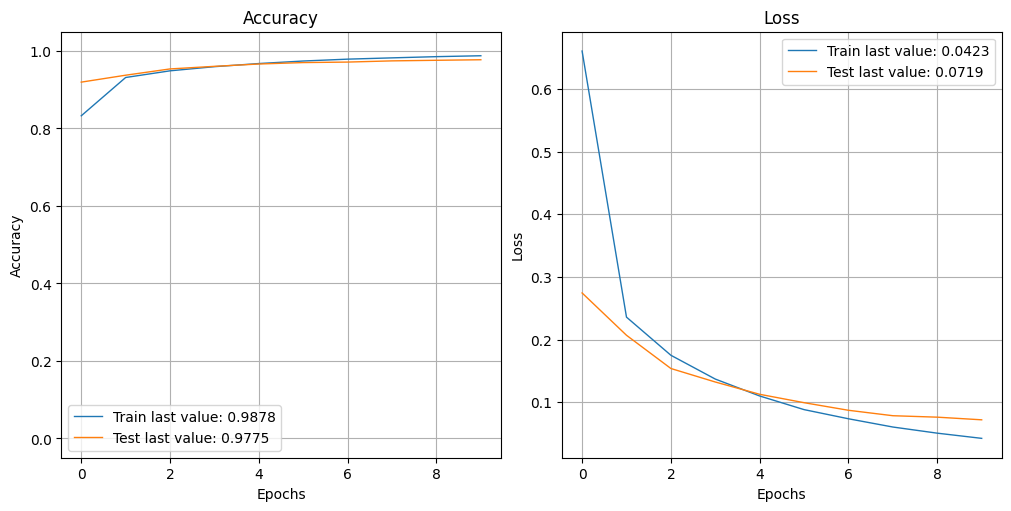

2024-04-25 11:55:06.937965: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Test accuracy: 0.9775000214576721
Train accuracy: 0.9918833374977112


In [16]:
# Let's try with a slightly bigger model with more parameters.
mlflow.autolog()
with mlflow.start_run(run_name="Bigger model") as run:
    model2 = keras.Sequential()
    model2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
    model2.add(layers.Dense(128, activation='sigmoid'))
    model2.add(layers.Dense(10, activation='softmax'))
    model2.summary()
    model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history2 = model2.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
    show_history(history2)
    loss_test, acc_test = model2.evaluate(x_test, y_test, verbose=0)
    loss_trial, acc_trial = model2.evaluate(x_train, y_train, verbose=0)
    print("Test accuracy:", acc_test)
    print("Train accuracy:", acc_trial)


2024/04/25 11:55:24 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
/home/akranth/anaconda3/envs/big_data_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

2024-04-25 11:55:24.384567: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4656 - loss: 3.2996

469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4677 - loss: 3.2840 - val_accuracy: 0.7508 - val_loss: 1.5807
Epoch 2/10
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7500 - loss: 1.5382

469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7503 - loss: 1.5371 - val_accuracy: 0.8020 - val_loss: 1.3664
Epoch 3/10
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7893 - loss: 1.3615

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7893 - loss: 1.3612 - val_accuracy: 0.8037 - val_loss: 1.2646
Epoch 4/10
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8077 - loss: 1.2590

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8077 - loss: 1.2588 - val_accuracy: 0.8323 - val_loss: 1.1836
Epoch 5/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8216 - loss: 1.1797

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8216 - loss: 1.1797 - val_accuracy: 0.8264 - val_loss: 1.1397
Epoch 6/10
463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8230 - loss: 1.1369

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8231 - loss: 1.1368 - val_accuracy: 0.8376 - val_loss: 1.0775
Epoch 7/10
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8277 - loss: 1.1047

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8277 - loss: 1.1045 - val_accuracy: 0.8399 - val_loss: 1.0610
Epoch 8/10
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8309 - loss: 1.0738

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8309 - loss: 1.0738 - val_accuracy: 0.8453 - val_loss: 1.0351
Epoch 9/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8395 - loss: 1.0383

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8395 - loss: 1.0383 - val_accuracy: 0.8509 - val_loss: 0.9928
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8381 - loss: 1.0218 - val_accuracy: 0.8423 - val_loss: 0.9999
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


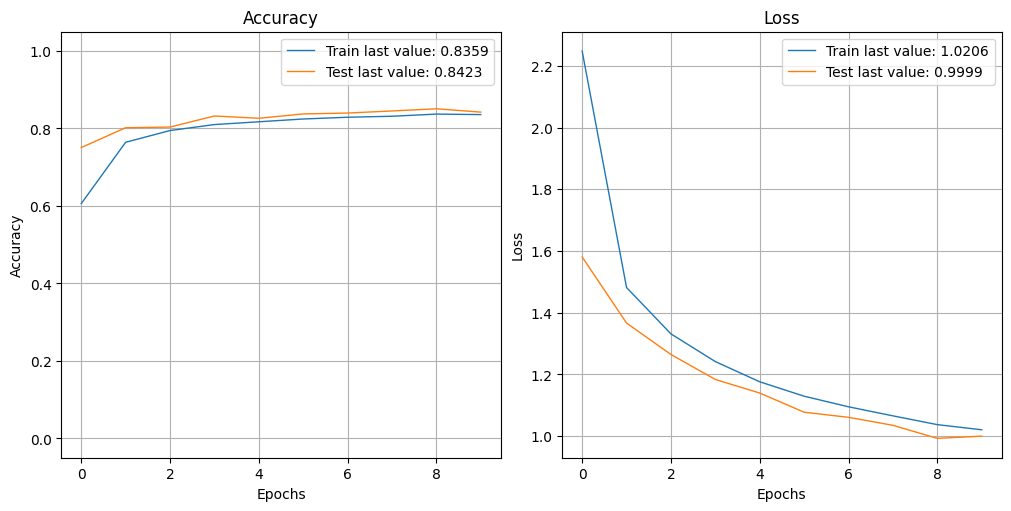

Test accuracy: 0.8422999978065491
Train accuracy: 0.8387333154678345


In [17]:
# let's try adding kernel regularization to the mix.
from tensorflow.keras import regularizers
mlflow.autolog()
with mlflow.start_run(run_name="Regularized model") as run:
    model_r = keras.Sequential()
    model_r.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(0.01)))
    model_r.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01)))
    model_r.add(layers.Dense(10, activation='softmax'))
    model_r.summary()
    model_r.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history_r = model_r.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
    show_history(history_r)
    loss_test, acc_test = model_r.evaluate(x_test, y_test, verbose=0)
    loss_trial, acc_trial = model_r.evaluate(x_train, y_train, verbose=0)
    print("Test accuracy:", acc_test)
    print("Train accuracy:", acc_trial)

In [18]:
from tensorflow.keras.layers import Dropout

2024/04/25 11:56:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
/home/akranth/anaconda3/envs/big_data_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4081 - loss: 1.7342

469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.4101 - loss: 1.7286 - val_accuracy: 0.8921 - val_loss: 0.4076
Epoch 2/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8229 - loss: 0.5918

469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8230 - loss: 0.5916 - val_accuracy: 0.9152 - val_loss: 0.2905
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8691 - loss: 0.4512

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8691 - loss: 0.4512 - val_accuracy: 0.9270 - val_loss: 0.2444
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8843 - loss: 0.3926

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8843 - loss: 0.3926 - val_accuracy: 0.9334 - val_loss: 0.2175
Epoch 5/10
463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8985 - loss: 0.3524

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8985 - loss: 0.3522 - val_accuracy: 0.9396 - val_loss: 0.1955
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9065 - loss: 0.3221

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9065 - loss: 0.3221 - val_accuracy: 0.9463 - val_loss: 0.1776
Epoch 7/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9152 - loss: 0.2963

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9152 - loss: 0.2963 - val_accuracy: 0.9467 - val_loss: 0.1675
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9194 - loss: 0.2772

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9194 - loss: 0.2772 - val_accuracy: 0.9510 - val_loss: 0.1584
Epoch 9/10
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9215 - loss: 0.2684

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9216 - loss: 0.2683 - val_accuracy: 0.9534 - val_loss: 0.1465
Epoch 10/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9268 - loss: 0.2519

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9268 - loss: 0.2518 - val_accuracy: 0.9554 - val_loss: 0.1409
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


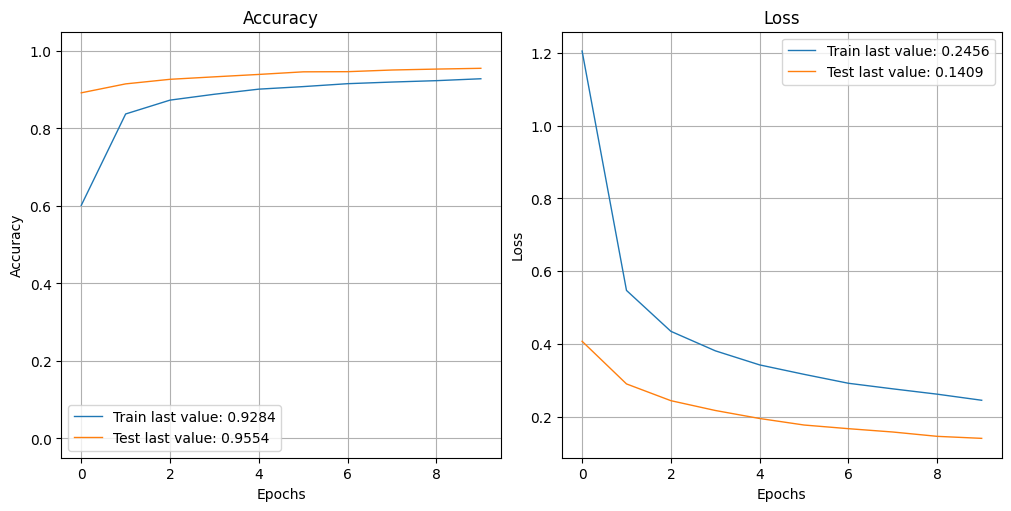

Test accuracy: 0.9553999900817871
Train accuracy: 0.958816647529602


In [19]:
mlflow.autolog()
with mlflow.start_run(run_name="Dropout model") as run:
    model_d = keras.Sequential()
    model_d.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
    model_d.add(Dropout(0.7))
    model_d.add(layers.Dense(128, activation='sigmoid'))
    model_d.add(Dropout(0.6))
    model_d.add(layers.Dense(10, activation='softmax'))
    model_d.summary()
    model_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history_d = model_d.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
    show_history(history_d)
    loss_test, acc_test = model_d.evaluate(x_test, y_test, verbose=0)
    loss_trial, acc_trial = model_d.evaluate(x_train, y_train, verbose=0)
    print("Test accuracy:", acc_test)
    print("Train accuracy:", acc_trial)


2024/04/25 11:56:53 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7232 - loss: 1.0706

469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7242 - loss: 1.0666 - val_accuracy: 0.9195 - val_loss: 0.2842
Epoch 2/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9274 - loss: 0.2541

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9274 - loss: 0.2540 - val_accuracy: 0.9382 - val_loss: 0.2030
Epoch 3/10
460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9467 - loss: 0.1802

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9467 - loss: 0.1801 - val_accuracy: 0.9534 - val_loss: 0.1541
Epoch 4/10
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9586 - loss: 0.1399

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9586 - loss: 0.1399 - val_accuracy: 0.9616 - val_loss: 0.1273
Epoch 5/10
462/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9659 - loss: 0.1145

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9660 - loss: 0.1144 - val_accuracy: 0.9629 - val_loss: 0.1206
Epoch 6/10
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9750 - loss: 0.0867

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9750 - loss: 0.0867 - val_accuracy: 0.9706 - val_loss: 0.0972
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9787 - loss: 0.0736

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9787 - loss: 0.0736 - val_accuracy: 0.9740 - val_loss: 0.0874
Epoch 8/10
463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9817 - loss: 0.0610

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9817 - loss: 0.0610 - val_accuracy: 0.9750 - val_loss: 0.0817
Epoch 9/10
457/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9851 - loss: 0.0495

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9851 - loss: 0.0495 - val_accuracy: 0.9756 - val_loss: 0.0788
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9880 - loss: 0.0419

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9880 - loss: 0.0419 - val_accuracy: 0.9766 - val_loss: 0.0708


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


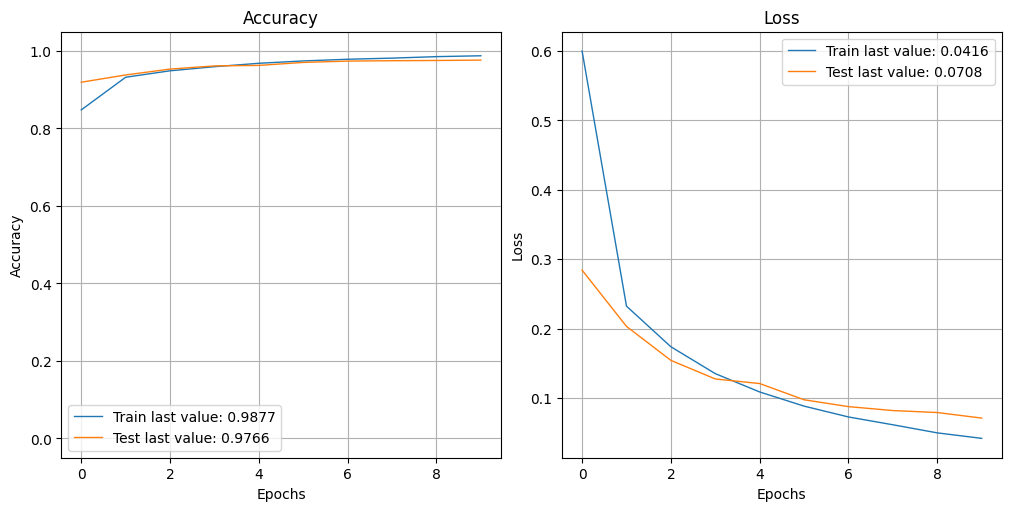

Test accuracy: 0.9765999913215637
Train accuracy: 0.9918000102043152


In [20]:
# EARLY STOPPING METHOD
mlflow.autolog()
with mlflow.start_run(run_name="Early Stopping") as run:
    model_es = keras.Sequential()
    model_es.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
    model_es.add(layers.Dense(128, activation='sigmoid'))
    model_es.add(layers.Dense(10, activation='softmax'))
    model_es.summary()
    model_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
    history_es = model_es.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test), callbacks=[early_stopping])
    show_history(history_es)
    loss_test, acc_test = model_es.evaluate(x_test, y_test, verbose=0)
    loss_trial, acc_trial = model_es.evaluate(x_train, y_train, verbose=0)
    print("Test accuracy:", acc_test)
    print("Train accuracy:", acc_trial)


In [21]:
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py

In [51]:
# model will get saved at the end of every epoch automatically.
checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.hdf5")
history_es = model_re.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3995 - accuracy: 0.8874 - val_loss: 0.1976 - val_accuracy: 0.9408
Epoch 2/10
  25/1875 [..............................] - ETA: 8s - loss: 0.2172 - accuracy: 0.9275

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1875/1875 [==============================] - 17s 9ms/step - loss: 0.1711 - accuracy: 0.9480 - val_loss: 0.1398 - val_accuracy: 0.9574
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1175 - accuracy: 0.9648 - val_loss: 0.1037 - val_accuracy: 0.9682
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0893 - accuracy: 0.9731 - val_loss: 0.0901 - val_accuracy: 0.9717
Epoch 5/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0713 - accuracy: 0.9786 - val_loss: 0.0820 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0594 - accuracy: 0.9820 - val_loss: 0.0728 - val_accuracy: 0.9765
Epoch 7/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0489 - accuracy: 0.9850 - val_loss: 0.0790 - val_accuracy: 0.9763
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0756 - val_accuracy: 0.97

In [ ]:
show_history(history_es)

In [ ]:
es = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=2)
model_re.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.1013 - val_accuracy: 0.9751
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0246 - accuracy: 0.9931 - val_loss: 0.1038 - val_accuracy: 0.9756
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0221 - accuracy: 0.9936 - val_loss: 0.1121 - val_accuracy: 0.9745


2024/04/25 11:57:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
/home/akranth/anaconda3/envs/big_data_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_18 (Dense)                │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8296 - loss: 0.5545

469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8307 - loss: 0.5509 - val_accuracy: 0.9621 - val_loss: 0.1223
Epoch 2/10
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9690 - loss: 0.1018

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9690 - loss: 0.1017 - val_accuracy: 0.9664 - val_loss: 0.1034
Epoch 3/10
463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9794 - loss: 0.0657

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9794 - loss: 0.0657 - val_accuracy: 0.9745 - val_loss: 0.0814
Epoch 4/10
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9828 - loss: 0.0509

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9828 - loss: 0.0510 - val_accuracy: 0.9791 - val_loss: 0.0756
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9851 - loss: 0.0450 - val_accuracy: 0.9728 - val_loss: 0.0898
Epoch 6/10
459/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9877 - loss: 0.0377

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9877 - loss: 0.0377 - val_accuracy: 0.9748 - val_loss: 0.0858
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9890 - loss: 0.0350 - val_accuracy: 0.9756 - val_loss: 0.0862
Epoch 8/10
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9895 - loss: 0.0315

469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9895 - loss: 0.0315 - val_accuracy: 0.9776 - val_loss: 0.0781
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9916 - loss: 0.0251 - val_accuracy: 0.9777 - val_loss: 0.0852
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9920 - loss: 0.0245 - val_accuracy: 0.9767 - val_loss: 0.0859


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


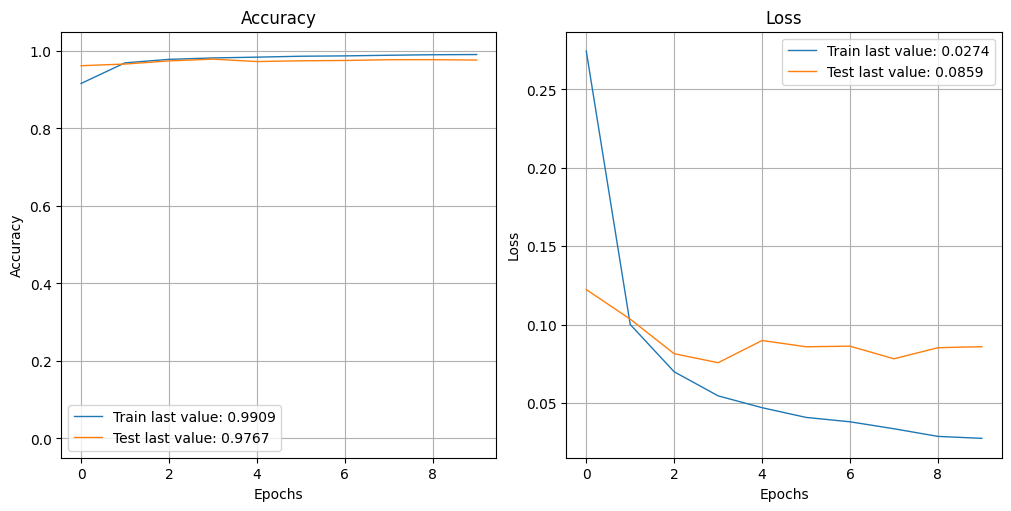

Test accuracy: 0.9767000079154968
Train accuracy: 0.9918666481971741


In [22]:
# Using LEarning rates now.
mlflow.autolog()
with mlflow.start_run(run_name="Learning Rate") as run:
    model_lr = keras.Sequential()
    model_lr.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
    model_lr.add(layers.Dense(128, activation='sigmoid'))
    model_lr.add(layers.Dense(10, activation='softmax'))
    model_lr.summary()
    model_lr.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
    history_lr = model_lr.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
    show_history(history_lr)
    loss_test, acc_test = model_lr.evaluate(x_test, y_test, verbose=0)
    loss_trial, acc_trial = model_lr.evaluate(x_train, y_train, verbose=0)
    print("Test accuracy:", acc_test)
    print("Train accuracy:", acc_trial)

2024/04/25 11:59:07 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
/home/akranth/anaconda3/envs/big_data_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,020 (62.58 KB)

 Trainable params: 16,020 (62.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0985 - loss: 2.4197

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0985 - loss: 2.4197 - val_accuracy: 0.0982 - val_loss: 2.4210
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0993 - loss: 2.4191

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0992 - loss: 2.4192 - val_accuracy: 0.0982 - val_loss: 2.4206
Epoch 3/10
456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0960 - loss: 2.4208

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0961 - loss: 2.4208 - val_accuracy: 0.0982 - val_loss: 2.4201
Epoch 4/10
455/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0967 - loss: 2.4209

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0967 - loss: 2.4209 - val_accuracy: 0.0982 - val_loss: 2.4197
Epoch 5/10
454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0982 - loss: 2.4205

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0982 - loss: 2.4205 - val_accuracy: 0.0982 - val_loss: 2.4193
Epoch 6/10
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0950 - loss: 2.4209

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0950 - loss: 2.4209 - val_accuracy: 0.0982 - val_loss: 2.4189
Epoch 7/10
448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0955 - loss: 2.4237

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0956 - loss: 2.4235 - val_accuracy: 0.0982 - val_loss: 2.4185
Epoch 8/10
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0969 - loss: 2.4193

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0969 - loss: 2.4193 - val_accuracy: 0.0982 - val_loss: 2.4180
Epoch 9/10
460/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0979 - loss: 2.4183

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.0979 - loss: 2.4183 - val_accuracy: 0.0982 - val_loss: 2.4176
Epoch 10/10
452/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0981 - loss: 2.4178

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0980 - loss: 2.4178 - val_accuracy: 0.0982 - val_loss: 2.4172
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


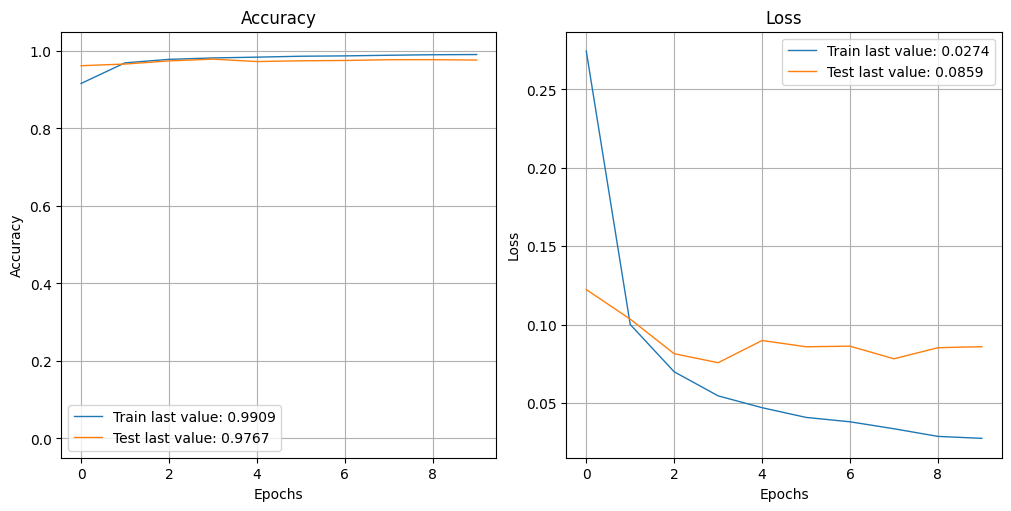

Test accuracy: 0.9767000079154968
Train accuracy: 0.9918666481971741


In [23]:
# too low learning rate
mlflow.autolog()
with mlflow.start_run(run_name="low Learning Rate") as run:
    model3 = keras.Sequential()
    model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model3.add(layers.Dense(10, activation='sigmoid'))
    model3.add(layers.Dense(10, activation='softmax'))
    model3.summary()
    opt_new = keras.optimizers.SGD(learning_rate=.00001)
    model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    history3 = model3.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
   
    show_history(history_lr)
    loss_test, acc_test = model_lr.evaluate(x_test, y_test, verbose=0)
    loss_trial, acc_trial = model_lr.evaluate(x_train, y_train, verbose=0)
    print("Test accuracy:", acc_test)
    print("Train accuracy:", acc_trial)



2024/04/25 11:59:33 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
/home/akranth/anaconda3/envs/big_data_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,020 (62.58 KB)

 Trainable params: 16,020 (62.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
450/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1166 - loss: 2.3296

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.1181 - loss: 2.3287 - val_accuracy: 0.1859 - val_loss: 2.2841
Epoch 2/10
451/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1744 - loss: 2.2781

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1746 - loss: 2.2779 - val_accuracy: 0.1937 - val_loss: 2.2577
Epoch 3/10
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2019 - loss: 2.2528

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2020 - loss: 2.2527 - val_accuracy: 0.2251 - val_loss: 2.2291
Epoch 4/10
463/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2479 - loss: 2.2232

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2481 - loss: 2.2230 - val_accuracy: 0.2974 - val_loss: 2.1922
Epoch 5/10
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3122 - loss: 2.1848

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3124 - loss: 2.1847 - val_accuracy: 0.3457 - val_loss: 2.1443
Epoch 6/10
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3475 - loss: 2.1358

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3476 - loss: 2.1357 - val_accuracy: 0.3806 - val_loss: 2.0833
Epoch 7/10
456/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3828 - loss: 2.0727

469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3830 - loss: 2.0722 - val_accuracy: 0.4016 - val_loss: 2.0101
Epoch 8/10
448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4072 - loss: 1.9993

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4074 - loss: 1.9983 - val_accuracy: 0.4292 - val_loss: 1.9280
Epoch 9/10
461/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4342 - loss: 1.9150

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4343 - loss: 1.9146 - val_accuracy: 0.4483 - val_loss: 1.8420
Epoch 10/10
448/469 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4525 - loss: 1.8281

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4529 - loss: 1.8273 - val_accuracy: 0.4801 - val_loss: 1.7566
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


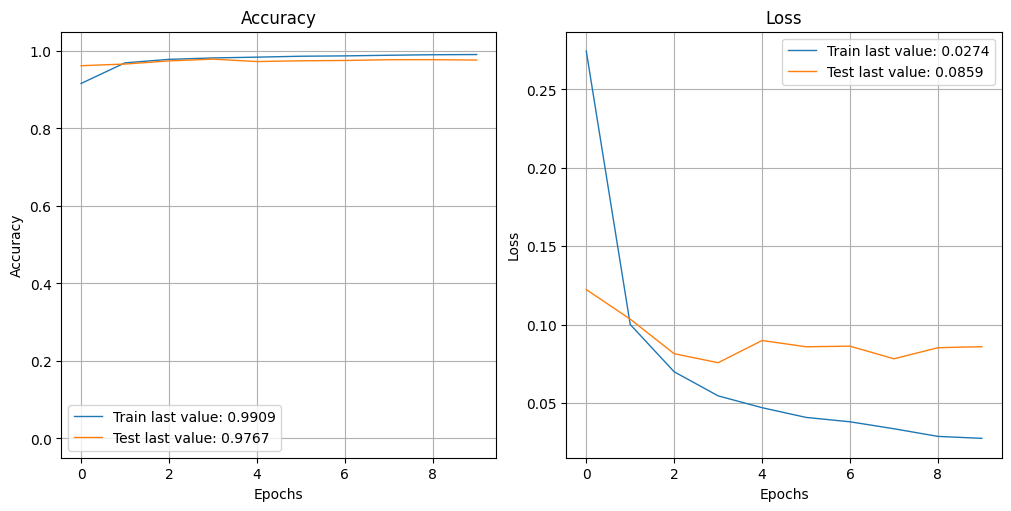

Test accuracy: 0.9767000079154968
Train accuracy: 0.9918666481971741


In [24]:
# optimal learning rate
mlflow.autolog()
with mlflow.start_run(run_name="optimal Learning Rate") as run:
    model3 = keras.Sequential()
    model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model3.add(layers.Dense(10, activation='sigmoid'))
    model3.add(layers.Dense(10, activation='softmax'))
    model3.summary()
    opt_new = keras.optimizers.SGD(learning_rate=.01)
    model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
    history3 = model3.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
    show_history(history_lr)
    loss_test, acc_test = model_lr.evaluate(x_test, y_test, verbose=0)
    loss_trial, acc_trial = model_lr.evaluate(x_train, y_train, verbose=0)
    print("Test accuracy:", acc_test)
    print("Train accuracy:", acc_trial)


In [ ]:
# optimal learning rate with momentum
model3 = keras.Sequential()
model3.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model3.add(layers.Dense(10, activation='sigmoid'))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
model3.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
model3.fit(x_train, y_train, epochs=20)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 20)                15700     
                                                                 
 dense_37 (Dense)            (None, 10)                210       
                                                                 
 dense_38 (Dense)            (None, 10)                110       
                                                                 
Total params: 16,020
Trainable params: 16,020
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1416 - accuracy: 0.3215
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5759 - accuracy: 0.5187
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.1739 - accuracy: 0.6662
Epoch 4

In [25]:
# Mini-batch SGD
# the default minibatch size is 32 unlike 1.
mlflow.autolog()
with mlflow.start_run(run_name="Mini-batch SGD") as run:
    model4 = keras.Sequential()
    model4.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
    model4.add(layers.Dense(10, activation='sigmoid'))
    model4.add(layers.Dense(10, activation='softmax'))
    model4.summary()
    opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
    model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    model4.fit(x_train, y_train, batch_size=512, epochs=10)
    

2024/04/25 12:00:50 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
/home/akranth/anaconda3/envs/big_data_lab/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │           110 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,020 (62.58 KB)

 Trainable params: 16,020 (62.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
108/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0998 - loss: 2.3278

2024/04/25 12:00:52 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1026 - loss: 2.3185
Epoch 2/10
116/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5166 - loss: 1.9879

2024/04/25 12:00:53 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5189 - loss: 1.9861
Epoch 3/10
102/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6971 - loss: 1.7242

2024/04/25 12:00:53 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6988 - loss: 1.7148
Epoch 4/10
107/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7381 - loss: 1.4735

2024/04/25 12:00:54 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7394 - loss: 1.4675
Epoch 5/10
110/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7813 - loss: 1.2424

2024/04/25 12:00:54 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7819 - loss: 1.2384
Epoch 6/10
110/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8131 - loss: 1.0378

2024/04/25 12:00:55 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8135 - loss: 1.0345
Epoch 7/10
112/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8370 - loss: 0.8682

2024/04/25 12:00:55 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8372 - loss: 0.8660
Epoch 8/10
110/118 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8529 - loss: 0.7305

2024/04/25 12:00:56 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8532 - loss: 0.7285
Epoch 9/10
104/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8719 - loss: 0.6200

2024/04/25 12:00:56 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8718 - loss: 0.6180
Epoch 10/10
108/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8810 - loss: 0.5422

2024/04/25 12:00:57 WARNING mlflow.utils.checkpoint_utils: Checkpoint logging is skipped, because checkpoint 'save_best_only' config is True, it requires to compare the monitored metric value, but the provided monitored metric value is not available.


118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8812 - loss: 0.5406
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
